##PROJECT DESCRIPTION

Title: Iris Flower Classification

To develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements.



In [2]:
#import libraries 
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
def wrangle (filepath):
    data = pd.read_csv(filepath)

    # Remove duplicates 
    data = data.drop_duplicates()

    # Reassign the specie names to integers
    label_encoder = LabelEncoder()
    data['species_encoded'] = label_encoder.fit_transform(data['species'])
          
    data.drop(columns = 'species', inplace= True)
    return data

In [19]:
data = wrangle('IRIS.csv')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [21]:
data['petal_width'].max(), data['petal_width'].min()

(2.5, 0.1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length     147 non-null    float64
 1   sepal_width      147 non-null    float64
 2   petal_length     147 non-null    float64
 3   petal_width      147 non-null    float64
 4   species_encoded  147 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.3 KB


In [6]:
unique_values = data.nunique()
unique_values

sepal_length       35
sepal_width        23
petal_length       43
petal_width        22
species_encoded     3
dtype: int64

In [7]:
#check for missing values 
data.isnull().sum()

sepal_length       0
sepal_width        0
petal_length       0
petal_width        0
species_encoded    0
dtype: int64

In [8]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

    

In [16]:
data[numerical_features].head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.335700
1,-1.157560,-0.128082,-1.357737,-1.335700
2,-1.399610,0.331139,-1.414778,-1.335700
3,-1.520635,0.101529,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
5,-0.552434,1.938414,-1.186613,-1.070902
6,-1.520635,0.790361,-1.357737,-1.203301
7,-1.036535,0.790361,-1.300696,-1.335700
8,-1.762685,-0.357693,-1.357737,-1.335700
9,-1.157560,0.101529,-1.300696,-1.468099


In [22]:
x = data[numerical_features]
y = data['species_encoded']


In [23]:
#split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size= 0.2, shuffle= True)


In [44]:
#Train the model
model = RandomForestClassifier(n_estimators = 20, max_depth = 5, random_state = 42)
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)

In [45]:
y_pred = model.predict(x_test)

In [46]:
accuracy_score(y_test, y_pred)

1.0

In [47]:
y_pred

array([1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2,
       0, 0, 1, 0, 1, 1, 2, 2])

In [48]:
model.score(x_train, y_train)

1.0

In [67]:
from sklearn.tree import DecisionTreeClassifier # Importing the needed library

model2 = DecisionTreeClassifier(criterion = 'entropy', splitter='random', max_features='log2', max_depth=10, random_state=42) # Instantiating the model

model2.fit(x_train, y_train) # Fitting the model...

y_pred = model2.predict(x_test) # Making predictions

print(accuracy_score(y_pred, y_test)) # Evaluate the accuracy score

1.0


In [68]:
model2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'random'}

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model3 = LogisticRegression()

model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


<Axes: >

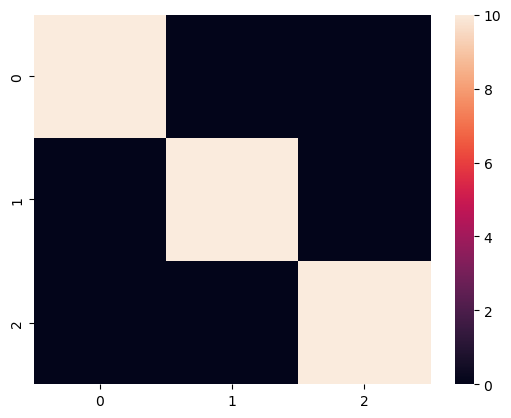

In [72]:
import seaborn as sns

confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix)

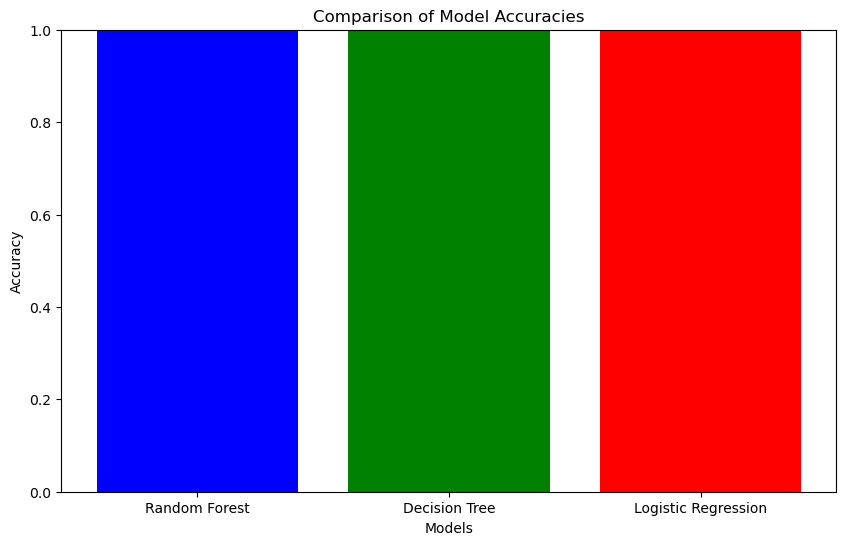

In [73]:
import matplotlib.pyplot as plt

# Accuracy scores of the models
accuracy_rf = accuracy_score(y_test, model.predict(x_test))
accuracy_dt = accuracy_score(y_test, model2.predict(x_test))
accuracy_lr = accuracy_score(y_test, model3.predict(x_test))

# Model names and their corresponding accuracy scores
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
accuracies = [accuracy_rf, accuracy_dt, accuracy_lr]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()